In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x=fetch_california_housing().data
y=fetch_california_housing().target


data=pd.DataFrame(x,columns=fetch_california_housing().feature_names)
data["house_value"]=y
data.head(100)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1   8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3   5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
..     ...       ...       ...        ...         ...       ...       ...   
95  2.0096      36.0  2.294016   1.066294      3469.0  1.493328     37.80   
96  2.8345      31.0  3.894915   1.127966      2048.0  1.735593     37.82   
97  2.0062      29.0  3.681319   1.175824       202.0  2.219780     37.81   
98  1.2185      22.0  2.945600   1.016000      2024.0  1.619200     37.82   
99  2.6104      37.0  3.707143   1.107143      1838.0  1.875510     37.82   

    Longitude  house_value  
0     -122.23        4.526  
1     -122.22        3.585  
2     -122.24        3.521  
3     -122.25        3.413  
4     -122.25        3.422  
..        ...          ...  
95    -122.26        1.300  
96    -122.26        1.838  
97    -122.26        1.250  
98    -122.26        1.700  
99    -122.26        1.931  

[100 rows x 9 columns]

In [3]:
print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(data.shape)

(20640, 9)


In [14]:
print(data.info(),data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

# EDA

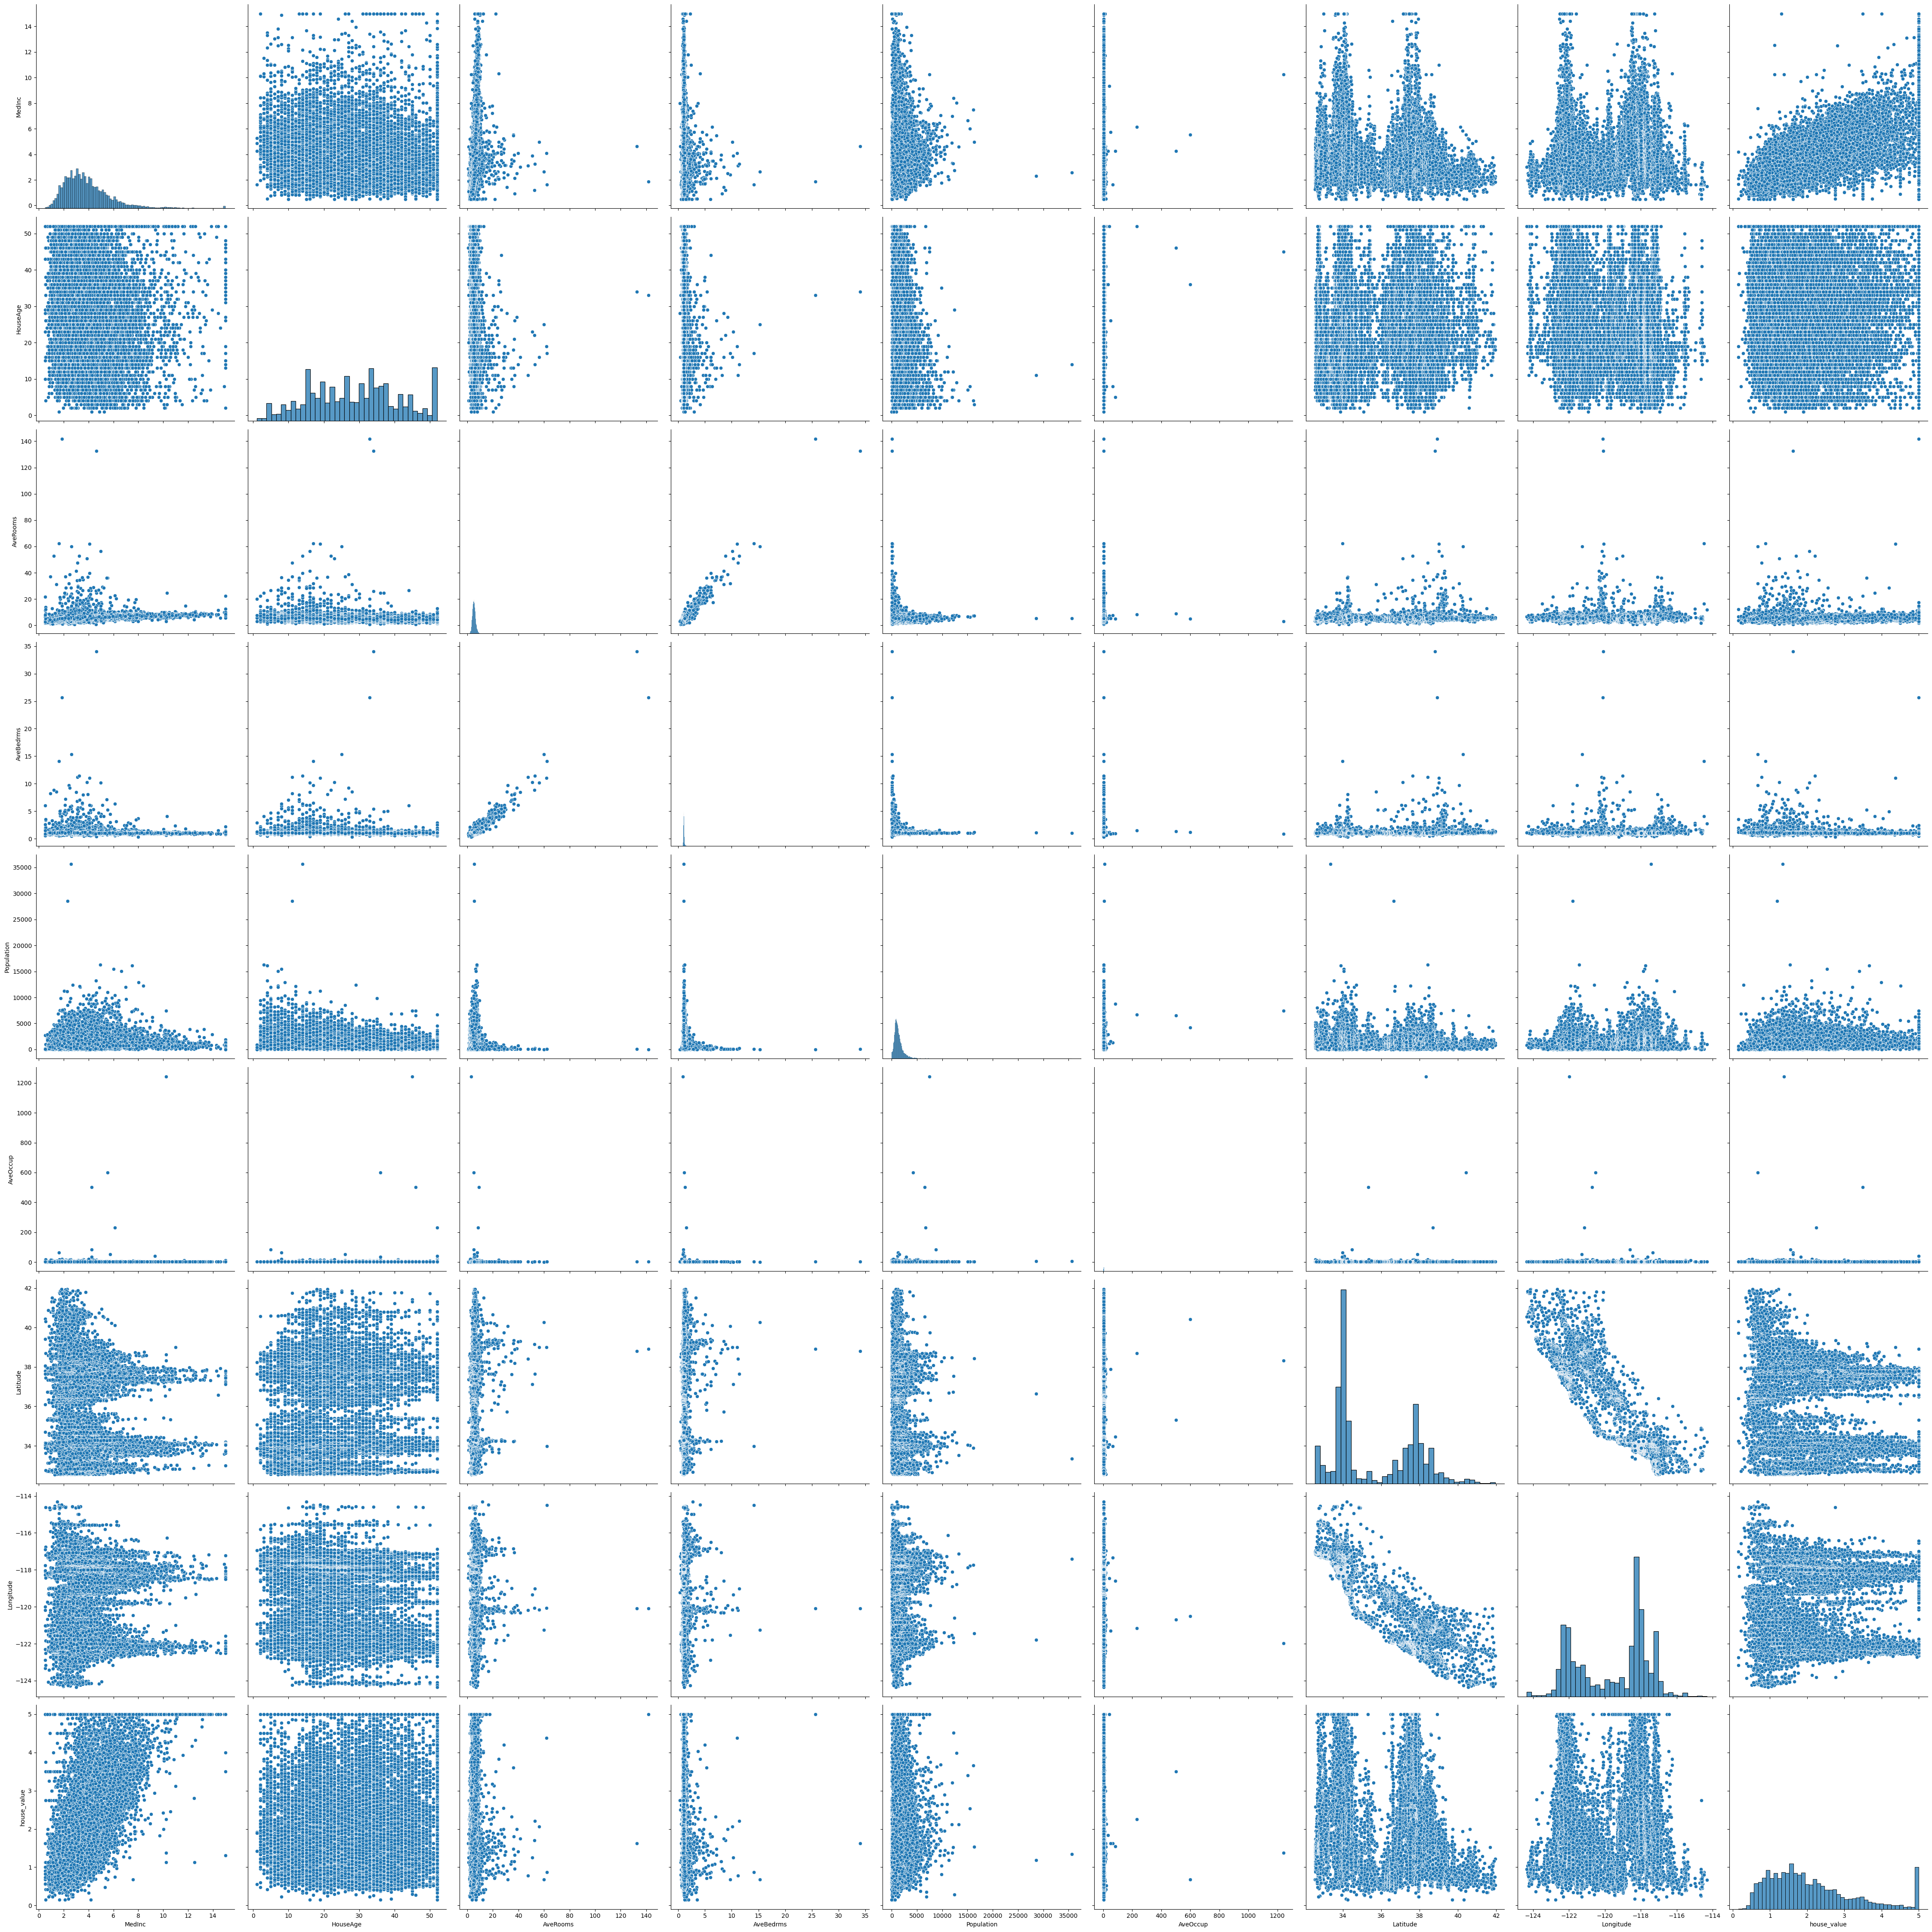

In [18]:
sns.pairplot(data,height=5)
plt.tight_layout()

In [19]:
print("skewness: %f" % data["house_value"].skew())
print("kurtosis: %f" % data["house_value"].kurt())

skewness: 0.977763
kurtosis: 0.327870


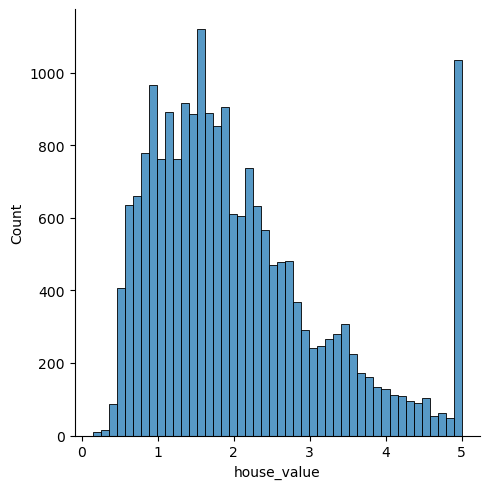

In [24]:
sns.displot(data["house_value"]);

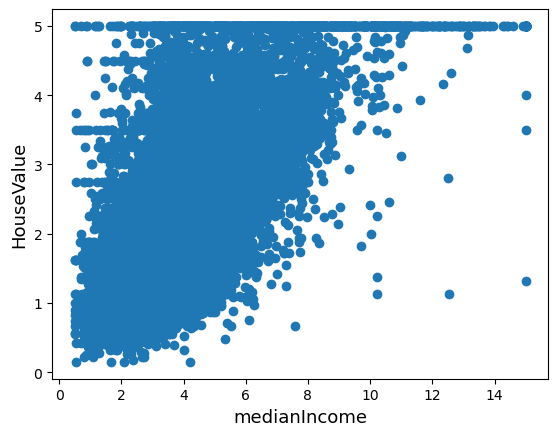

In [25]:
fig,ax=plt.subplots()
ax.scatter(x=data["MedInc"],y=data["house_value"])
plt.ylabel("HouseValue", fontsize=13)
plt.xlabel("medianIncome", fontsize=13)
plt.show()

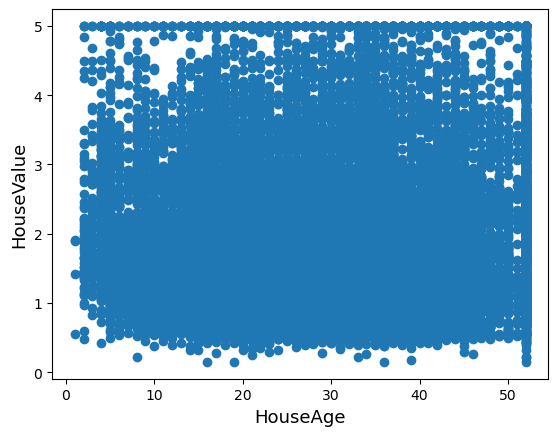

In [26]:
fig,ax=plt.subplots()
ax.scatter(x=data["HouseAge"],y=data["house_value"])
plt.ylabel("HouseValue", fontsize=13)
plt.xlabel("HouseAge", fontsize=13)
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_12640\1648816534.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['house_value'] , fit=norm);



 mu = 2.07 and sigma = 1.15



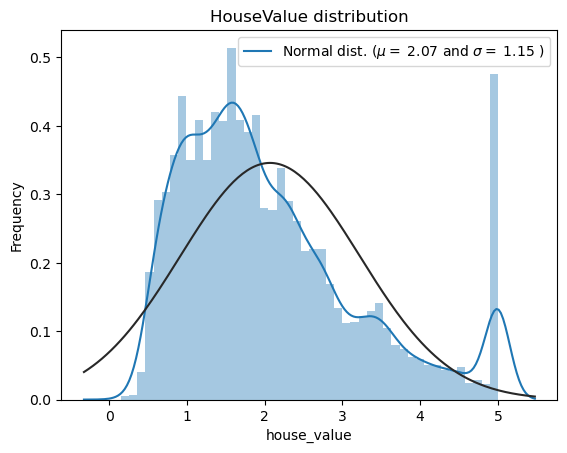

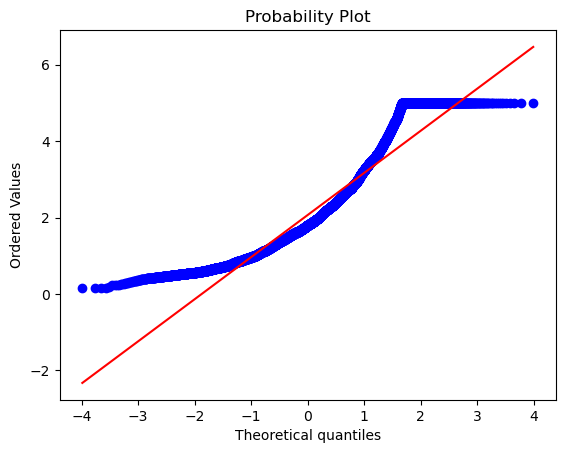

In [30]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['house_value'] , fit=norm);

(mu, sigma) = norm.fit(data['house_value'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('HouseValue distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['house_value'], plot=plt)
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_12640\1332836764.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['house_value'] , fit=norm);



 mu = 1.06 and sigma = 0.36



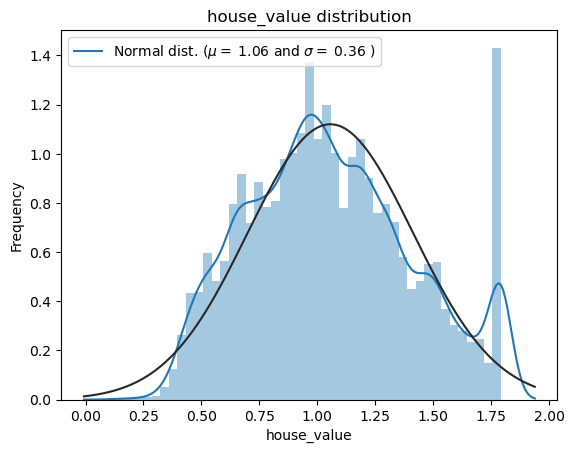

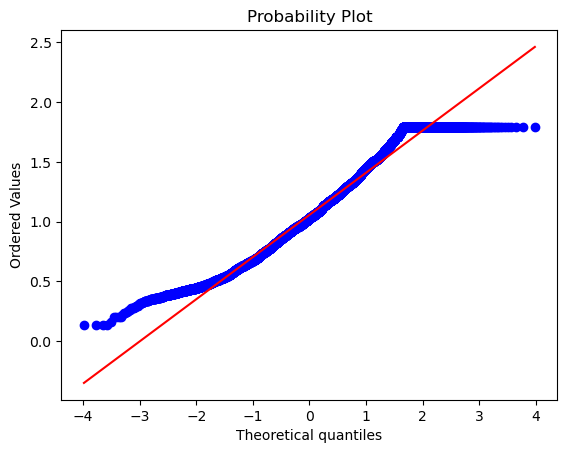

In [31]:
data["house_value"] = np.log1p(data["house_value"])

sns.distplot(data['house_value'] , fit=norm);

(mu, sigma) = norm.fit(data['house_value'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('house_value distribution')

fig = plt.figure()
res = stats.probplot(data['house_value'], plot=plt)
plt.show()

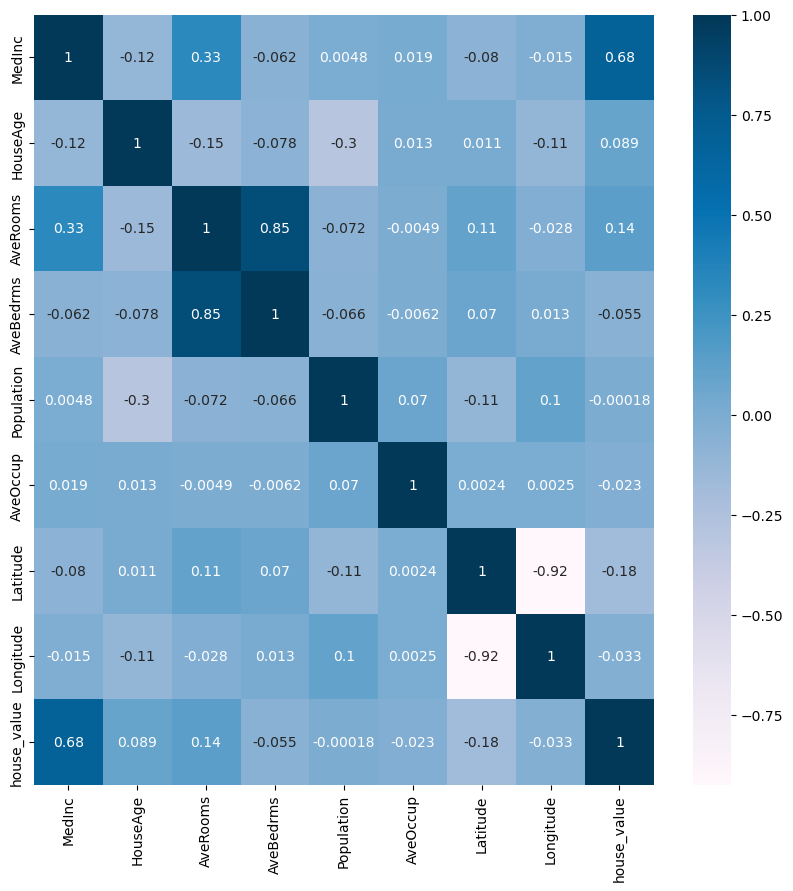

In [32]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [33]:
cor_target = abs(cor["house_value"]) # absolute value of the correlation 

relevant_features = cor_target[cor_target>0.2] # highly correlated features 

names = [index for index, value in relevant_features.iteritems()] # getting the names of the features 

names.remove('house_value') # removing target feature 

print(names) # printing the features 
print(len(names))

['MedInc']
1


C:\Users\OWNER\AppData\Local\Temp\ipykernel_12640\2191204454.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [index for index, value in relevant_features.iteritems()] # getting the names of the features


In [34]:
from sklearn.model_selection import train_test_split 

X = data.drop("house_value", axis=1) 
y = data["house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [36]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
predictions = lr.predict(X_test)  

print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  1.7094642265012248
Model Predicted Value:-  0.6275833553422885


In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

0.22436602177852202
